In [ ]:
#| default_exp time

In [ ]:
#| export
import json
from typing import Union

import pandas as pd

## Time Keeper

An object to keep track of time:

In [ ]:
#| export
class TimeKeeper:
    
    def __init__(self) -> None:
        
        self.df = pd.DataFrame(columns=['time'])
        self.df.index.name = 'category'
        
        
        # for making sure calls to `record` and `record_question` are not mixed
        self.record_type = None
    
    def process_category_name(self, category_name: Union[str, list]) -> str:
        
        # if the category is a string (rather than a list)...
        if type(category_name)==str:
            
            # ...an attempt...
            try:
            
                # ...to interpret it is made
                category_name = json.loads(category_name)
                
                # if it is still a string...
                if type(category_name)==str:
                    
                    # ...that's it
                    return category_name
                
                # if it's not a string, then it is assumed it is a list
            
            except json.JSONDecodeError:
                
                return category_name
        
        return category_name[-1].split('/')[-1]
    
    def record(self, minutes: int, category_name: Union[str, list]) -> None:
        
        if self.record_type is None:
            
            self.record_type = 'category'
        
        else:
            
            assert self.record_type == 'category', 'you cannot mix questions and categories'
        
        self.df.loc[self.process_category_name(category_name)] = minutes
        
    def record_question(self, minutes: int, question_name: str) -> None:
        
        if self.record_type is None:
            
            self.record_type = 'question'
        
        else:
            
            assert self.record_type == 'question', 'you cannot mix questions and categories'
        
        self.df.loc[question_name] = minutes
    
    def __str__(self) -> str:
        
        return f'Accumulated time: {self.df["time"].sum()} minutes'
    
    def plot(self):
        
        ax = self.df.plot.pie(y='time')
        ax.legend().remove()
        ax.set_ylabel(None)
        
        return ax

## For categories

After initialization,

In [ ]:
time_keeper = TimeKeeper()

it can be used to keep track of time by passing it the minutes an exercise should take and the category it belongs to

In [ ]:
time_keeper.record(10, 'Cat 1')
time_keeper.record(15, 'Cat 2')
time_keeper.record(5, ['Cat 3', 'Cat 3/subcat'])
time_keeper.record(2, ['Cat 3', 'Cat 3/subcat/subsubcat'])

It's also fine to pass a `json`-serialized list (or string)

In [ ]:
time_keeper.record(1, json.dumps(['Cat 4', 'Cat 4/cat 4 subcat']))
time_keeper.record(2, json.dumps('Cat 5'))

In [ ]:
time_keeper.df

,time
category,
Cat 1,10
Cat 2,15
subcat,5
subsubcat,2
cat 4 subcat,1
Cat 5,2


In [ ]:
print(time_keeper)

Accumulated time: 35 minutes


<Axes: >

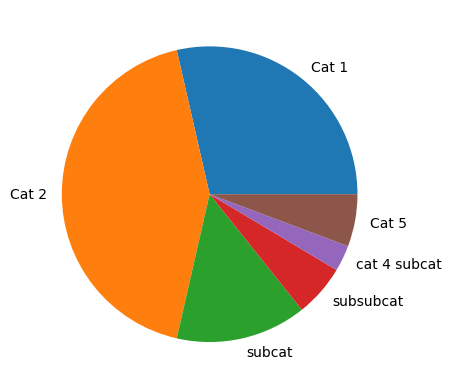

In [ ]:
time_keeper.plot()

## For questions

After initialization,

In [ ]:
time_keeper = TimeKeeper()

it can keep tabs on the time required by every question

In [ ]:
time_keeper.record_question(10, 'Q1')
time_keeper.record_question(3, 'Q2')
time_keeper.record_question(8, 'Q3')
time_keeper.record_question(12, 'Q4')

In [ ]:
time_keeper.df

,time
category,
Q1,10
Q2,3
Q3,8
Q4,12


Accumulated time: 33 minutes


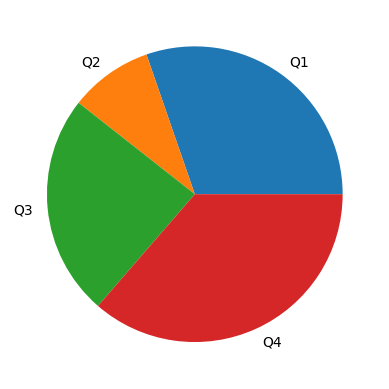

In [ ]:
time_keeper.plot()
print(time_keeper)

In [ ]:
#| hide
from nbdev.doclinks import nbdev_export

In [ ]:
#| hide
nbdev_export('50_time.ipynb')